In [220]:
%pylab inline
from math import log
from math import atan

Populating the interactive namespace from numpy and matplotlib


/home/cam/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['time', 'log']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [20]:
data = loadtxt("ck_trial1.txt")

First finding k in $$e^{-kt}$$

In [167]:
time, voltage = data[:,0,], data[:,1,]

offset = mean(voltage)
for i in range(len(voltage)):
    voltage[i] = voltage[i] - offset
    


In [168]:
mean(voltage)

-6.0325597994261376e-18

In [208]:
def grabber(x,y):
    curve = []
    
    for i in range(len(y)):
        if i != len(x)-1:
            if y[i] > y[i + 1] and y[i] > y[i-1]:
                curve.append([x[i], y[i]])
    return curve


In [209]:
expo_data = grabber(time,voltage)

In [210]:
for i in range(len(expo_data)):
    if (expo_data[i][1]) < 0:
        expo_data.pop(i)


IndexError: list index out of range

-0.000706961956438811 -5.851654985445813


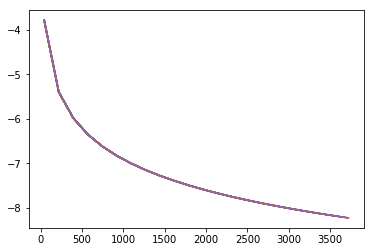

In [211]:
time_x = []
volt_y = []
for i in expo_data:
    time_x.append(i[0])
    volt_y.append(-log(i[0]))
    plt.plot(time_x, volt_y)
z,y = polyfit(time_x, volt_y, 1)
print(z, y)

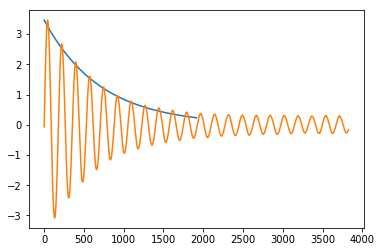

In [212]:
plt.plot(max(voltage) * e**(z * time))
plt.plot(time,voltage)

Next, finding $V(\theta)$

In [217]:
plus_distances  = [58.5, 58.5, 58.6]
minus_distances = [61.15, 61.1, 61.1]  # These distances are measurements off a meter stick, zeroed near 60cm


center = mean(plus_distances) + (mean(minus_distances) - mean(plus_distances))/2

mean_opps = []
for i in range(len(minus_distances)):
    mean_opps.append(minus_distances[i] - center)
    mean_opps.append(center - plus_distances[i])

In [223]:
ruler_distances = [104.2, 104.9, 103.0]
ruler_distance = mean(ruler_distances)
theta = atan(mean(mean_opps)/ruler_distance)
theta

0.012415254413127677

In [239]:
rs = [49.45e-3, 49.5e-3, 49.0e-3]
r = mean(rs)
r_squared = r**2
print(r_squared)
big_m = 2
small_m = 0.5
ds = [63.8e-3, 64.0e-3, 63.65e-3]
d  = mean(ds)
I  = 1/12 * 2.1 * (2*d)**2
k  = (2 * pi * 1/176)**2 * I 

0.0024321336111111118


In [240]:
G = k * theta * r_squared / (big_m * small_m)
print("%2.2e" %G)

1.10e-10
